# Student Performance Indicators

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### Imporing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

### load dataset
- The dataset is loaded using pandas library and stored in a dataframe called 'df'.

In [3]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.shape

(1000, 8)

## Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [7]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Check null values
- There are no null values in the dataset.

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check duplicate values

In [9]:
df.duplicated().sum()

np.int64(0)

### Checking data types of columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### unique values in categorical columns

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Statistical summary of numerical columns

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Explore Dataset

In [13]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [4]:
## numerical and categorical features
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print('{} Numerical features : '.format(len(numerical_features)), numerical_features)
print('{} Categorical features : '.format(len(categorical_features)), categorical_features)

3 Numerical features :  ['math_score', 'reading_score', 'writing_score']
5 Categorical features :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding 3 columns for total and average

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [20]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [6]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()

print('Number of students full marks in math : ', math_full)
print('Number of students full marks in reading : ', reading_full)
print('Number of students full marks in writing : ', writing_full)

Number of students full marks in math :  7
Number of students full marks in reading :  17
Number of students full marks in writing :  14


In [7]:
reading_full = df[df['reading_score'] <= 20]['average_score'].count()
writing_full = df[df['writing_score'] <= 20]['average_score'].count()
math_full = df[df['math_score'] <= 20]['average_score'].count()

print('Number of students full marks in math : ', math_full)
print('Number of students full marks in reading : ', reading_full)
print('Number of students full marks in writing : ', writing_full)

Number of students full marks in math :  4
Number of students full marks in reading :  1
Number of students full marks in writing :  3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### Exploring Data ( Visualization )
####  Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### Histogram & KDE plot for average score

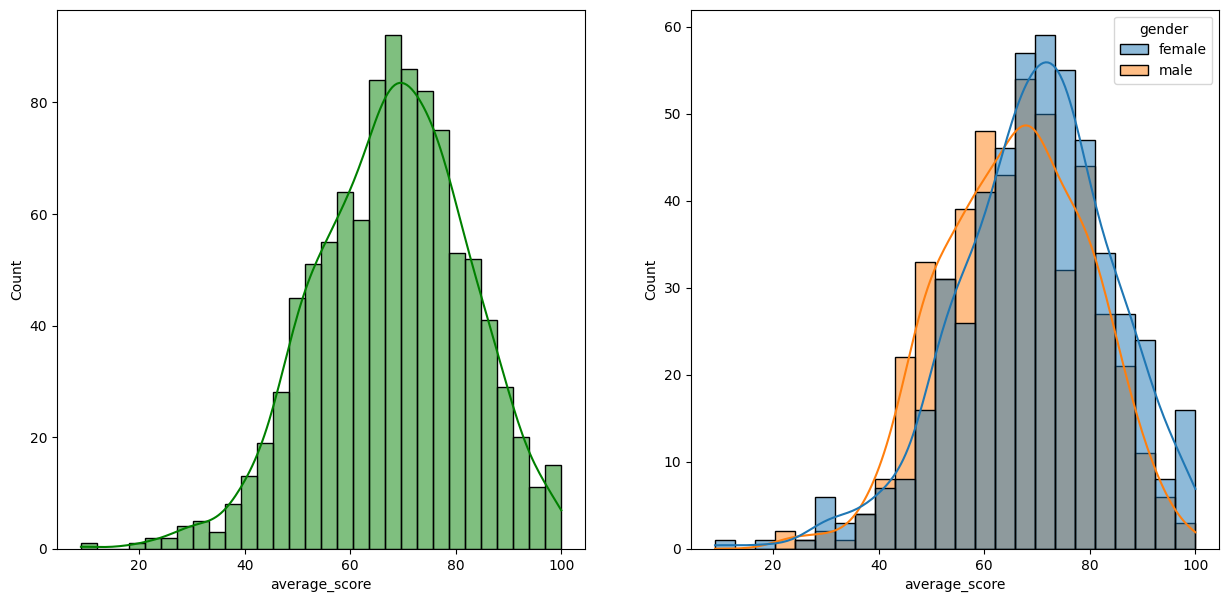

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

#### Histogram & KDE plot for total score

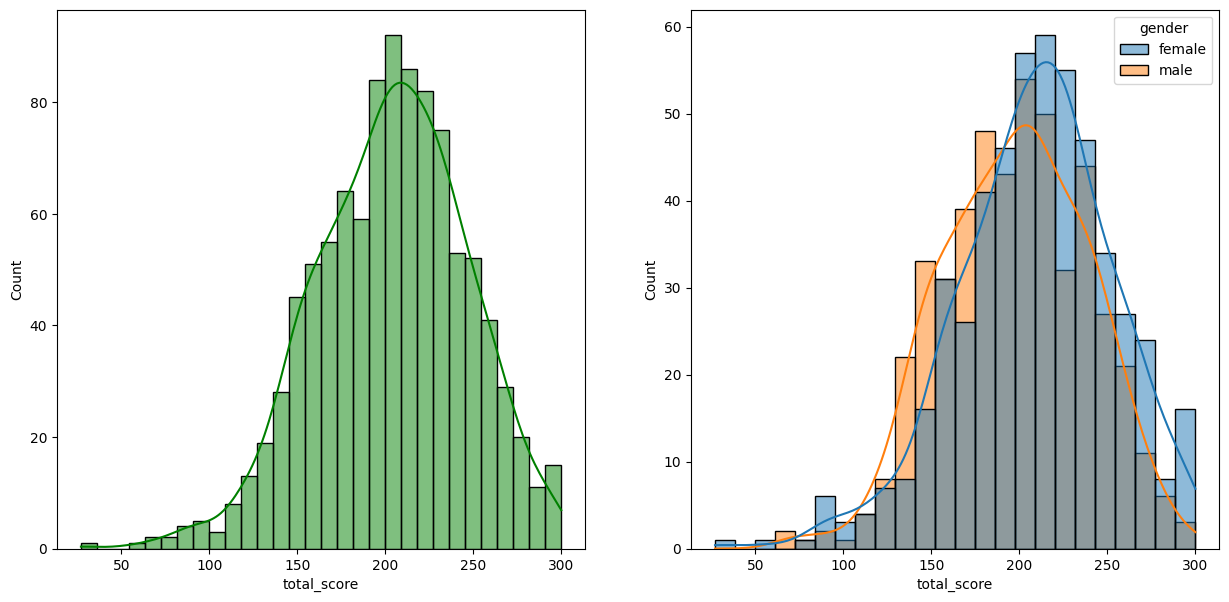

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

### Insights
- Feamale students have performed better than male students in both average score and total score.

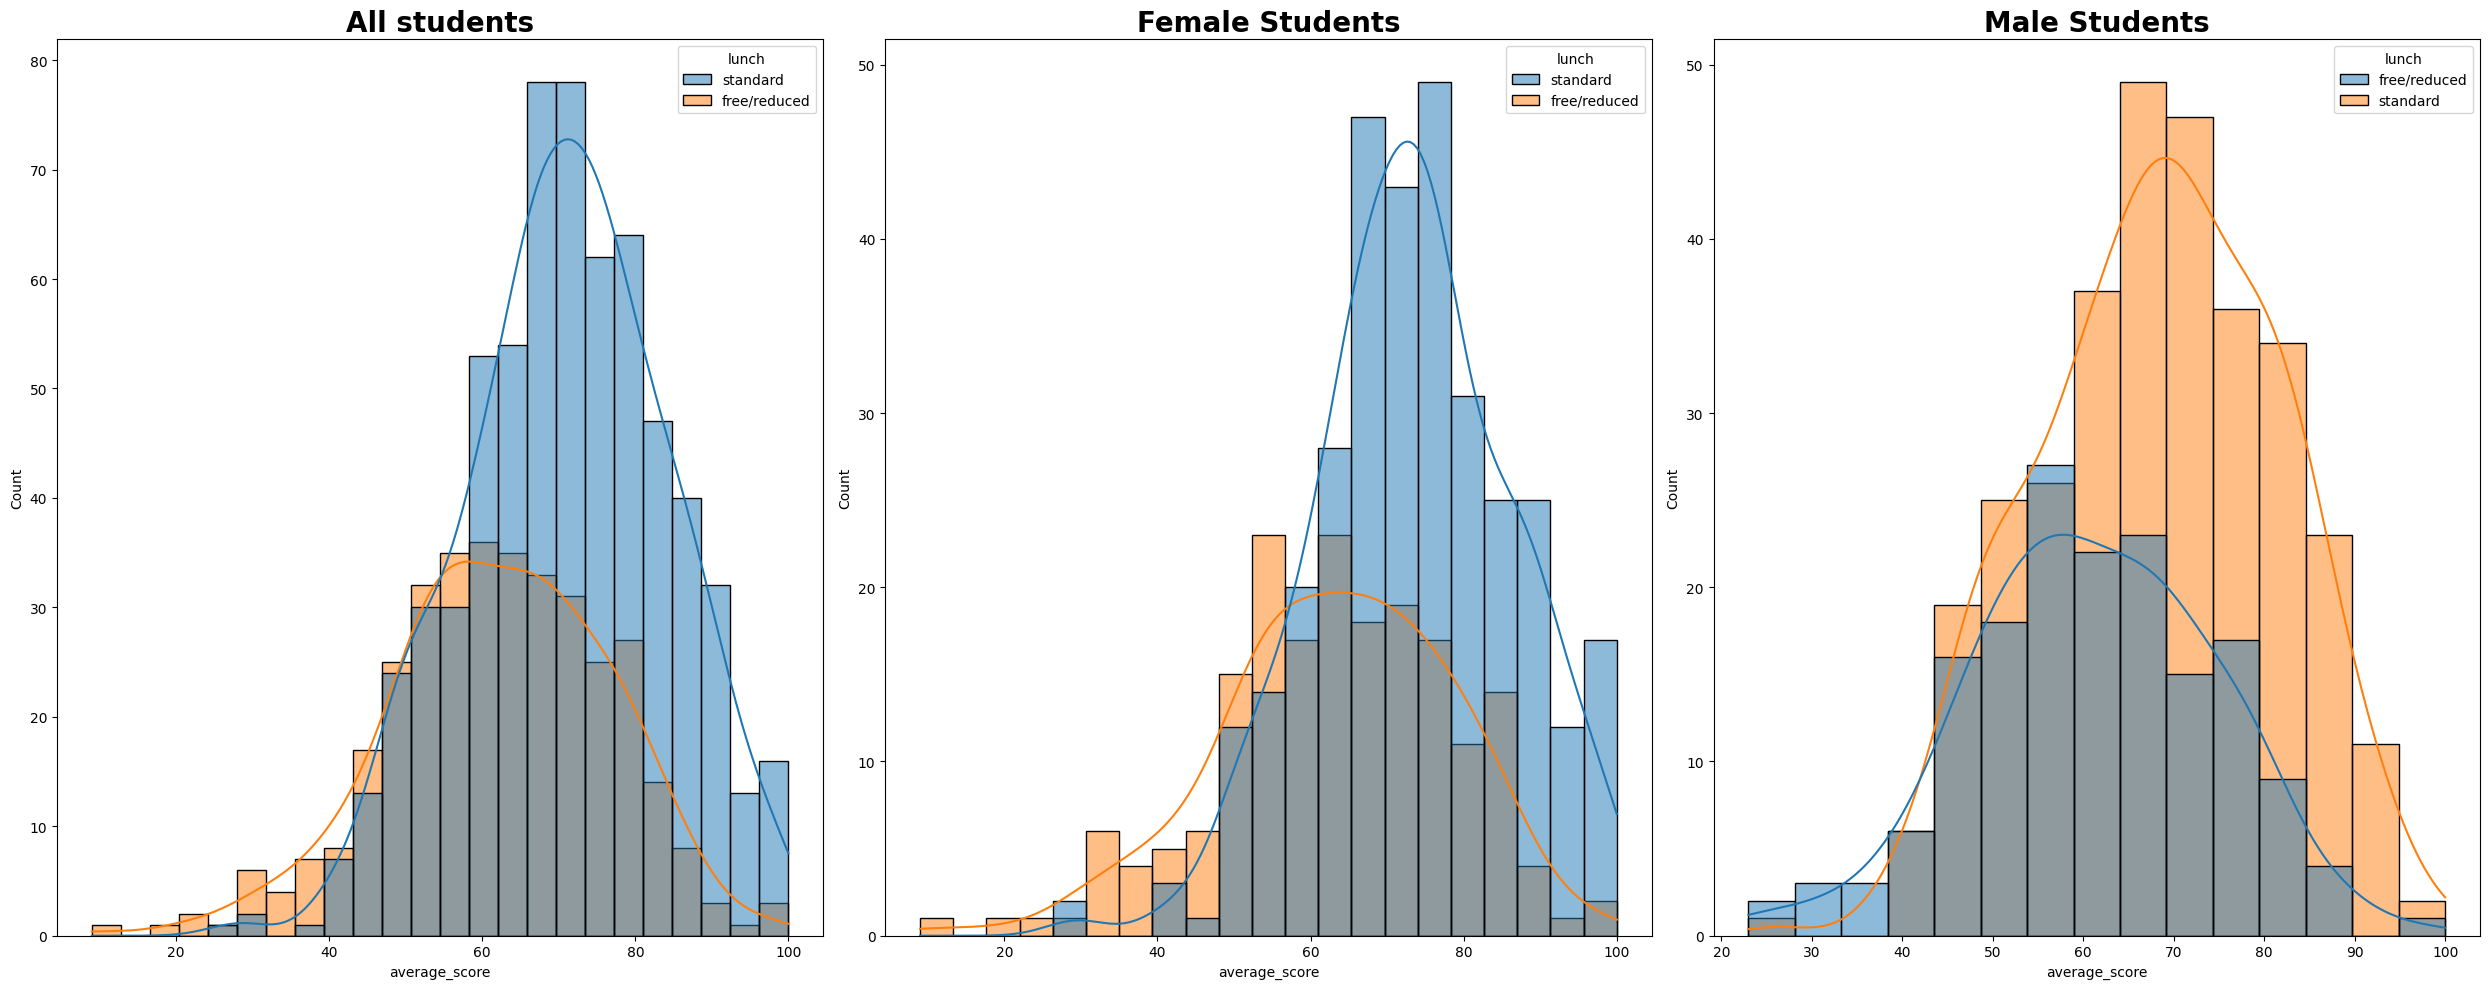

In [14]:
fig, axes =plt.subplots(1, 3, figsize=(25, 10))
sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('All students', fontweight='bold', fontsize=20)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female Students', fontweight='bold', fontsize=20)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male Students', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

Text(0.5, 1.0, 'Male Students')

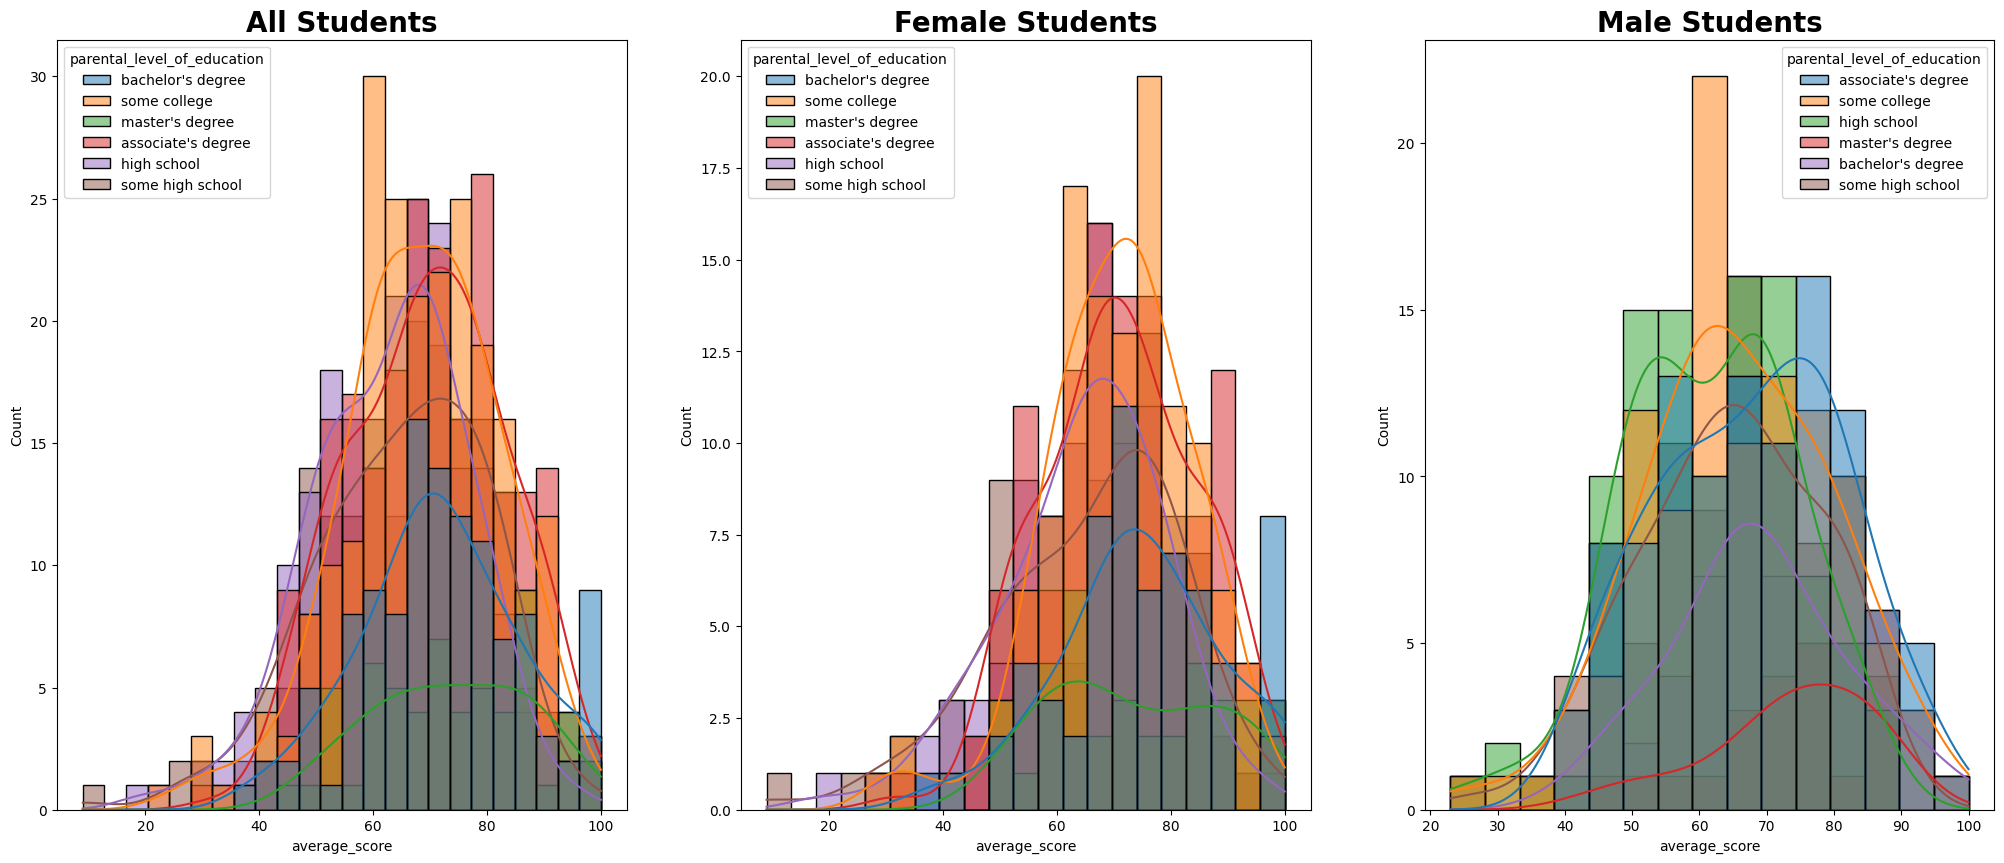

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title("All Students", fontweight='bold', fontsize=20)

sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Female Students', fontweight='bold', fontsize=20)

sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Male Students', fontweight='bold', fontsize=20)

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

Text(0.5, 1.0, 'Male Students')

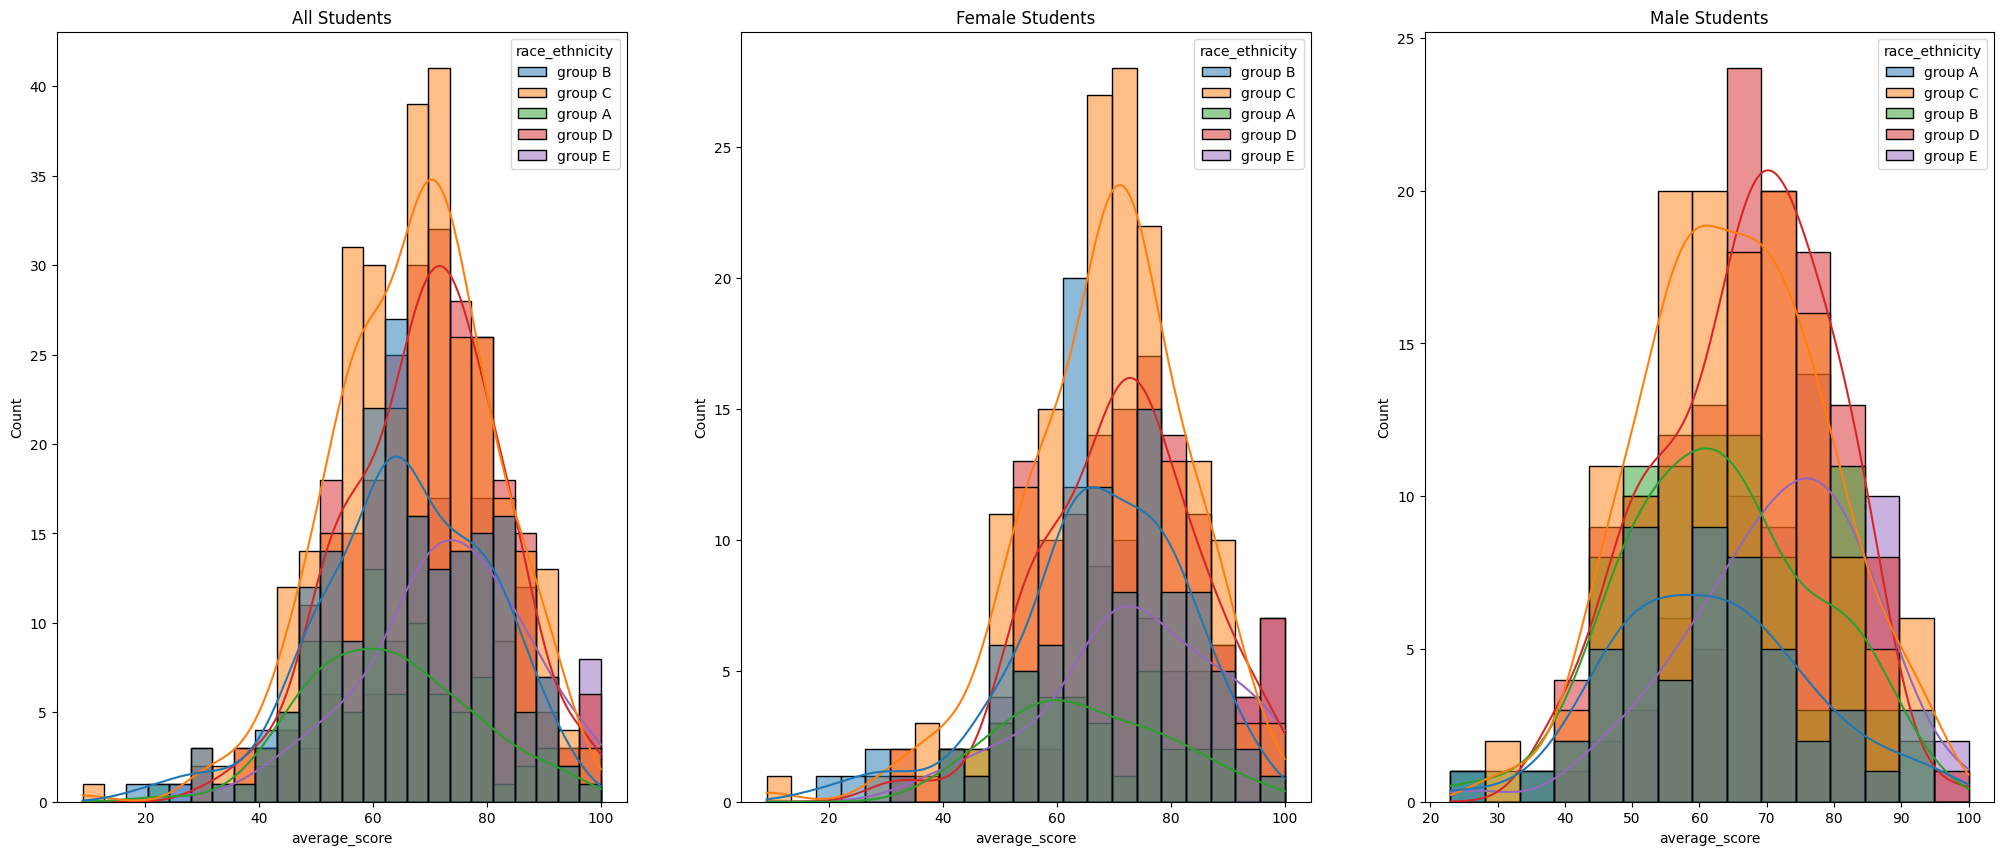

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title('All Students')

sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Female Students')

sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title('Male Students')



#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum score of students performs in all three subjects

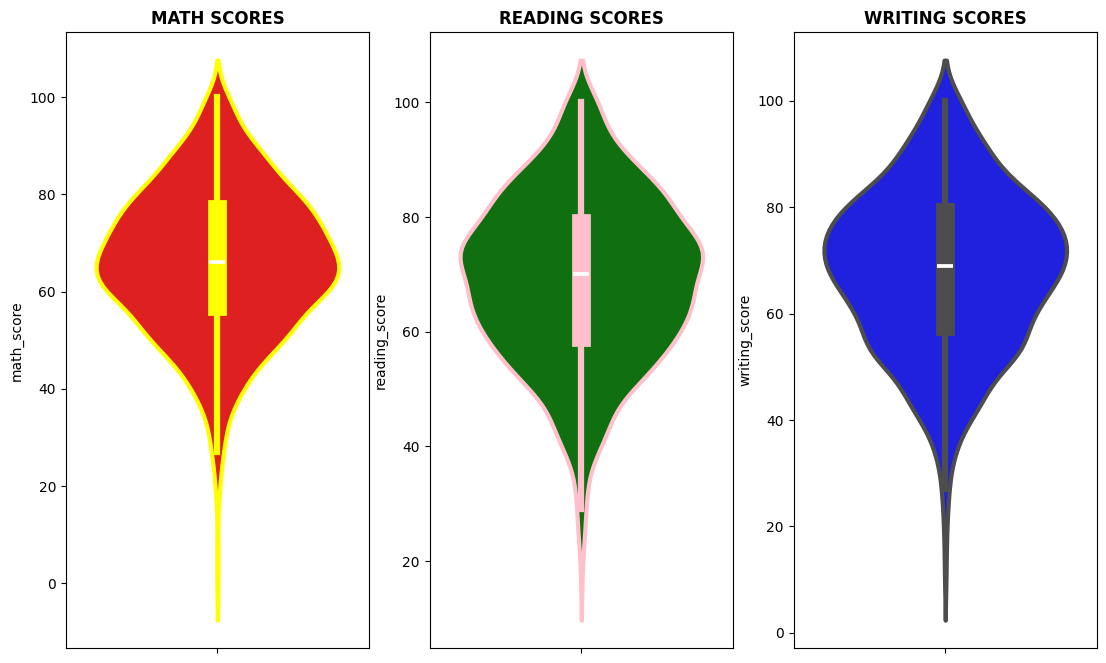

In [13]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES', fontweight='bold')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3, linecolor='yellow')
plt.subplot(1, 4, 2)
plt.title('READING SCORES', fontweight='bold')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3, linecolor='pink')
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES', fontweight='bold')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## Multivariate Analysis using Plot

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

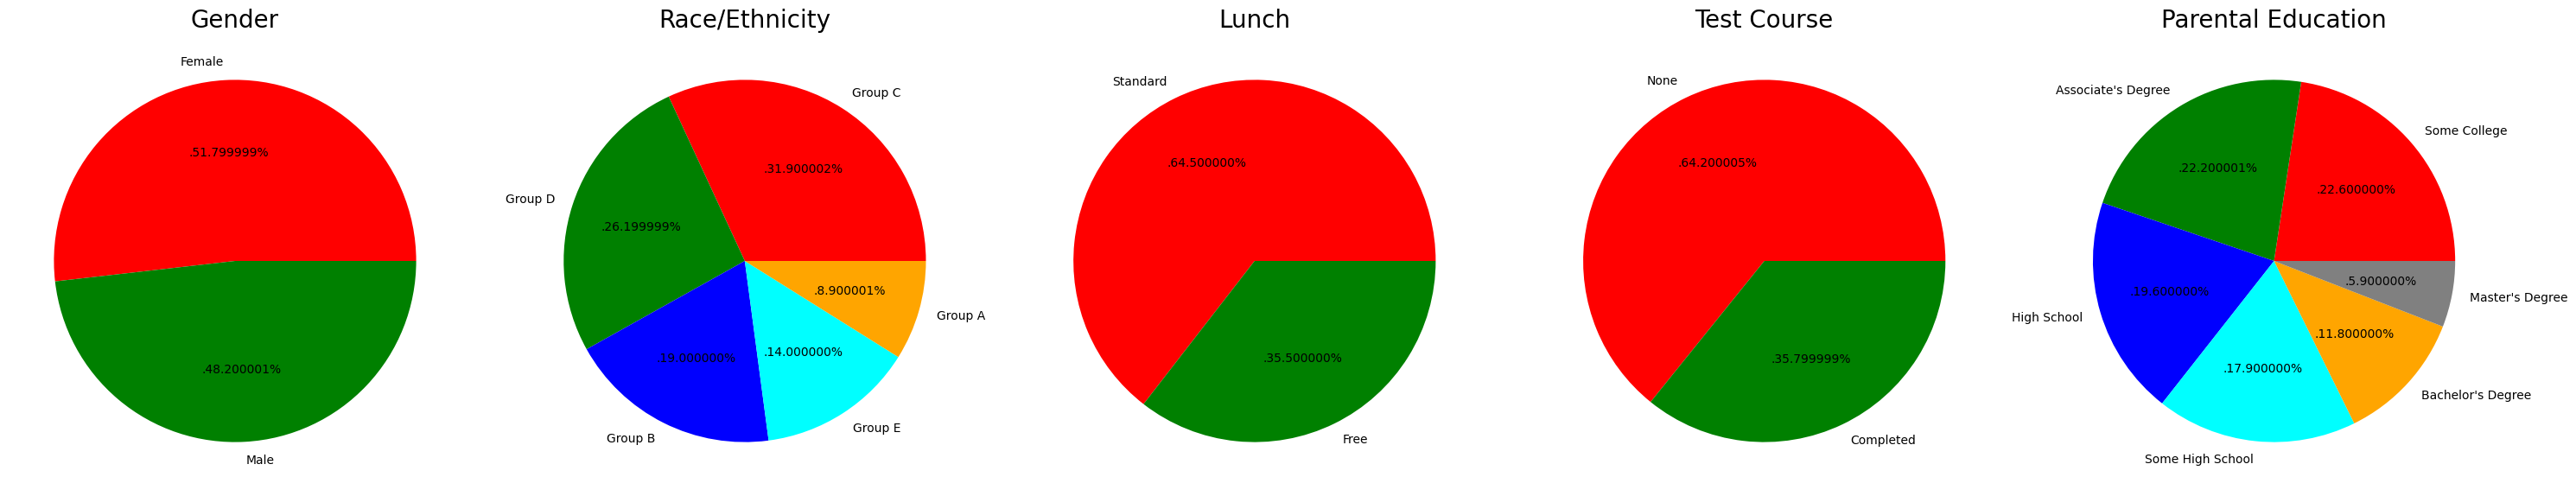

In [9]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization
#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

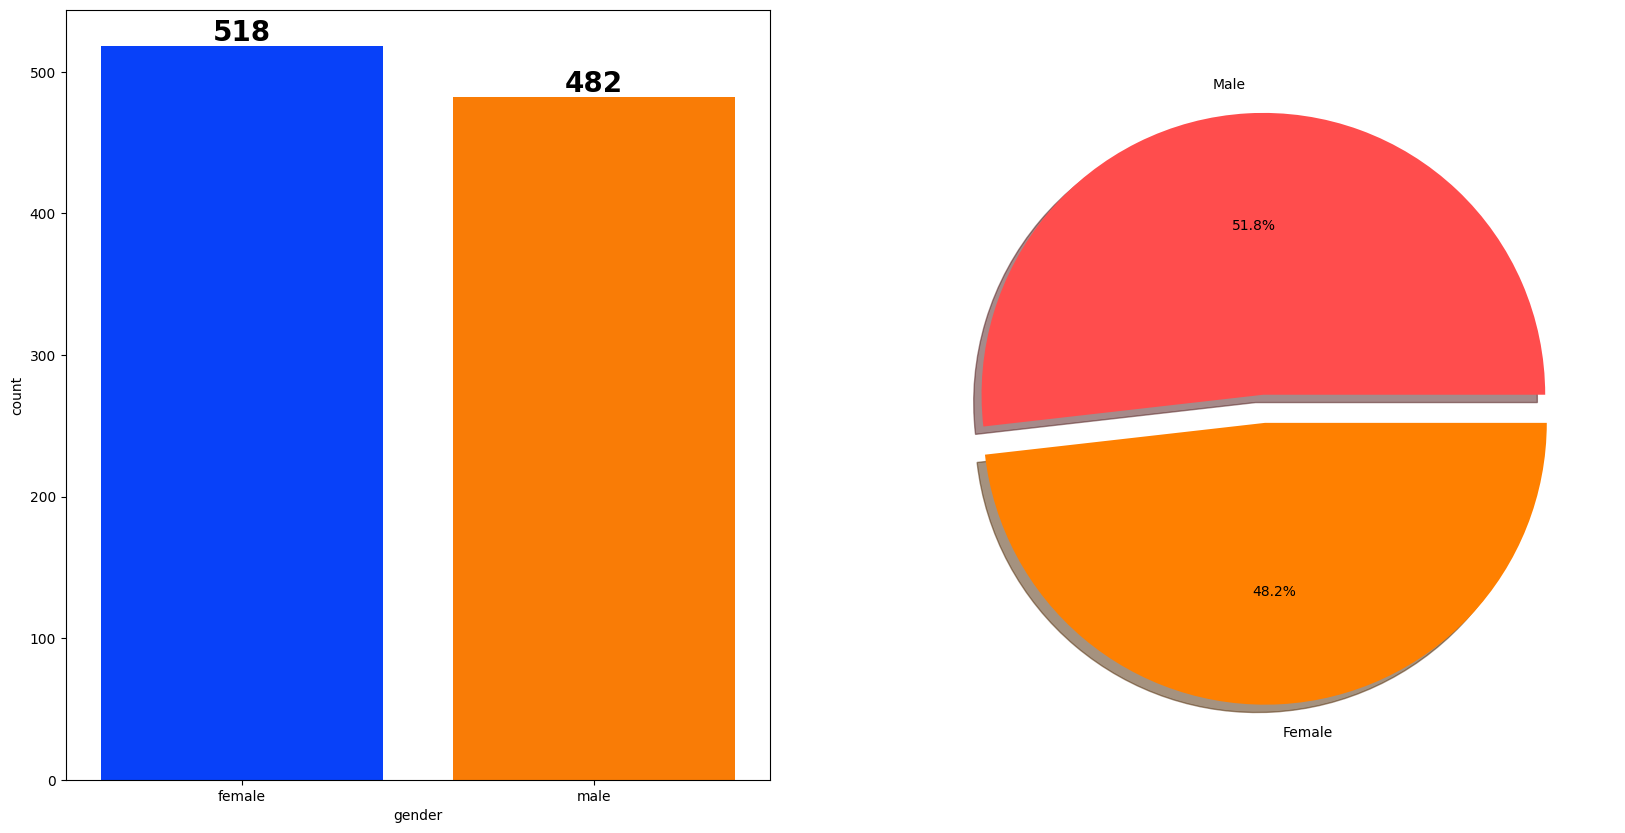

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20, fontweight='bold')
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [11]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


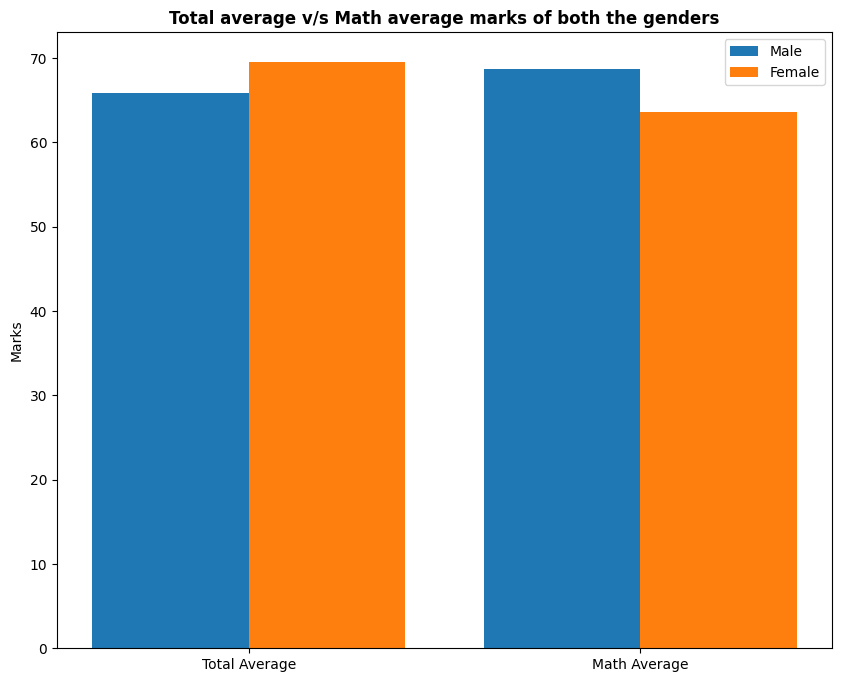

In [13]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### Univariate Analysis ( How is Group wise distribution ? )

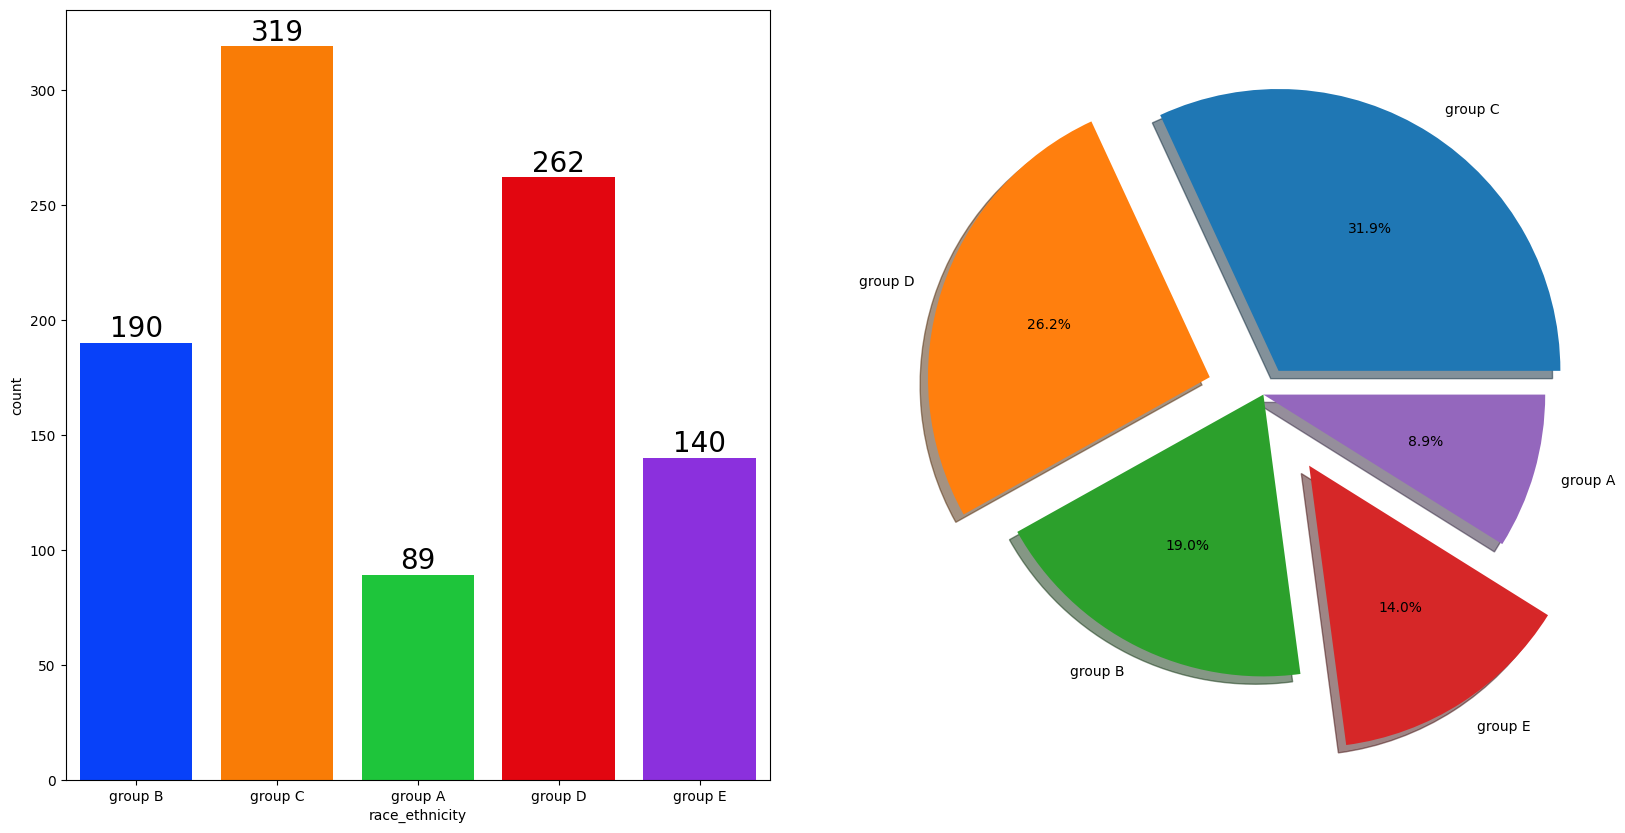

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0.2,0,0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
- Group C has the highest number of students followed by Group D and Group B.
- Group A has the least number of students.


#### Bivariate Analysis ( Is Race/Ethnicity has any impact on student's performance ? )

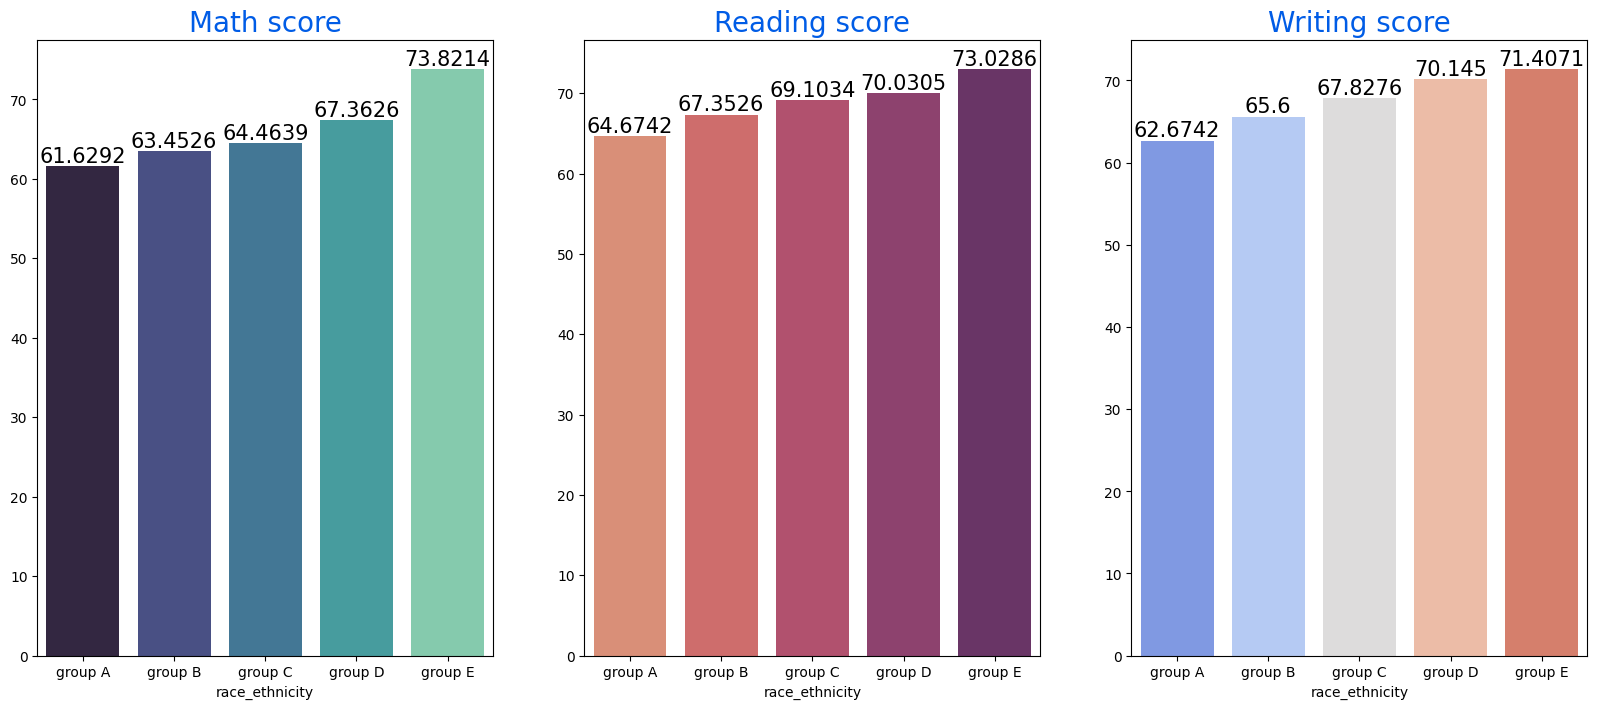

In [19]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette='coolwarm' ,ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E has the highest average score in all three subjects followed by Group D.
- Group A has the lowest average score in all three subjects.


### Parental level of education COLUMN
- How is Parental level of education wise distribution ?
- Is Parental level of education has any impact on student's performance ?

#### Univariate Analysis (How is Parental level of education wise distribution ? )

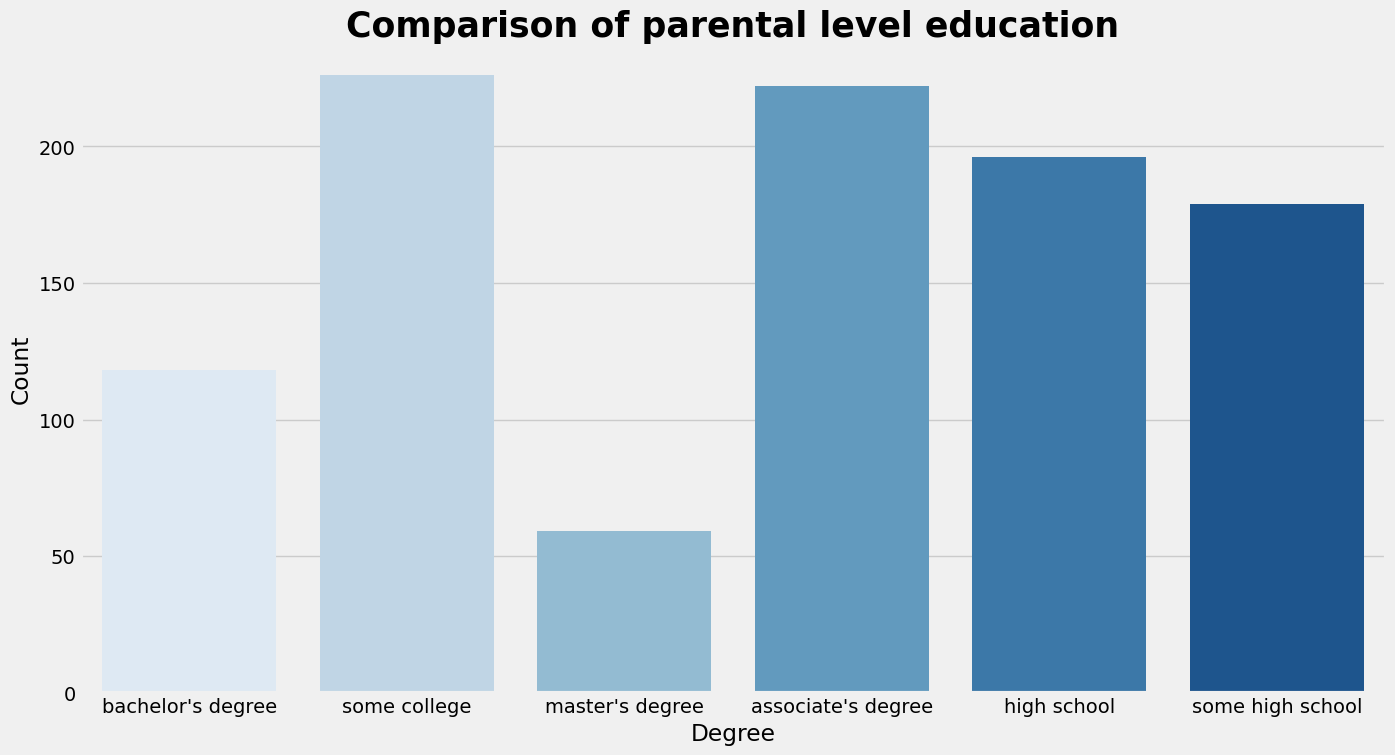

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], palette='Blues')
# sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of parental level education', fontweight=800, fontsize=25)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

### Insights
- Parents with some college education have the highest number of students followed by associate's degree.
- Parents with master's degree have the least number of students.

### Bivariate Analysis ( Is Parental level of education has any impact on student's performance ? )

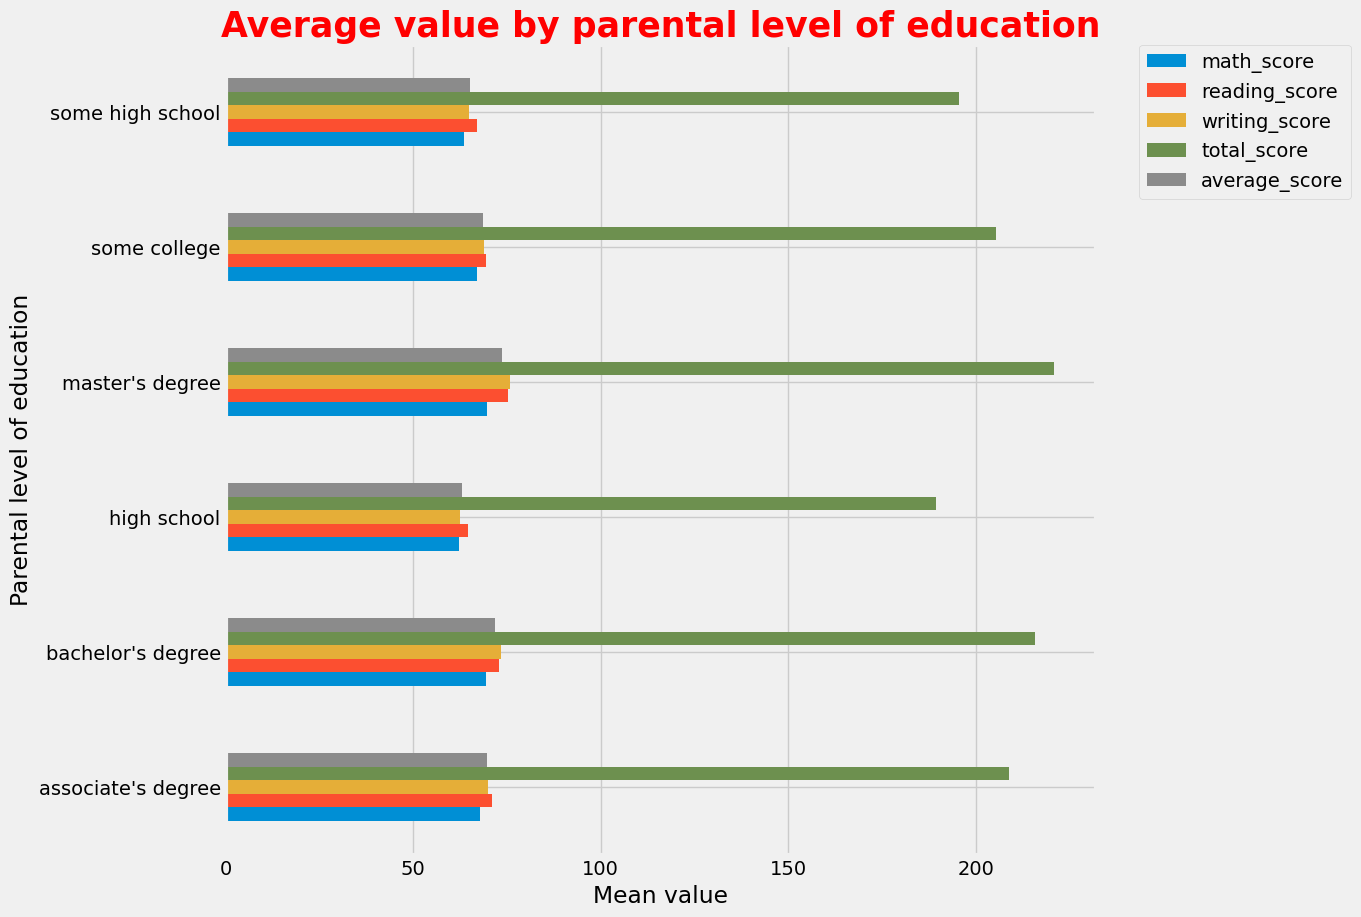

In [47]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average value by parental level of education', fontweight='bold', fontsize=25, color='red')
plt.xlabel('Mean value')
plt.ylabel('Parental level of education')
plt.show()

#### Insights
- Master's degree holders' children have the highest average scores across all subjects.
- High school degree holders' children have the lowest average scores across all subjects.

### Lunch COLUMN
- Which lunch type is more common ?
- Does lunch type affect student performance results ?
#### Univariate Analysis ( Which lunch type is more common ? )

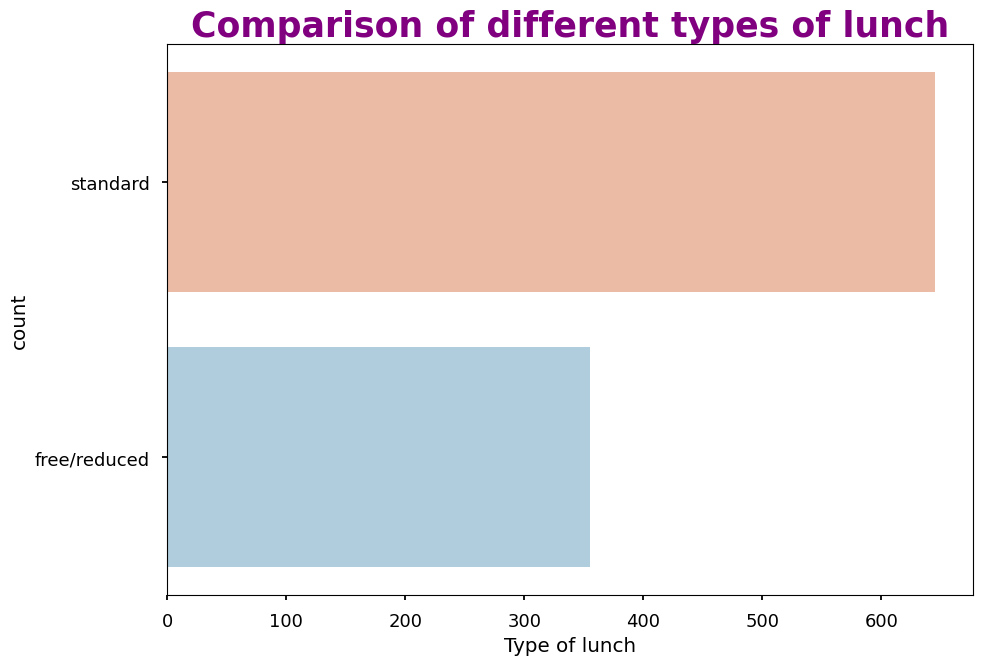

In [5]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette='RdBu')
plt.title("Comparison of different types of lunch", fontweight=800, fontsize=25, color='purple')
plt.xlabel('Type of lunch')
plt.ylabel('count')
plt.show()

#### Insights
- Majority of students (645) have standard lunch, while 355 students have free/reduced lunch.

#### Bivariate Analysis ( Does lunch type affect student performance results ? )

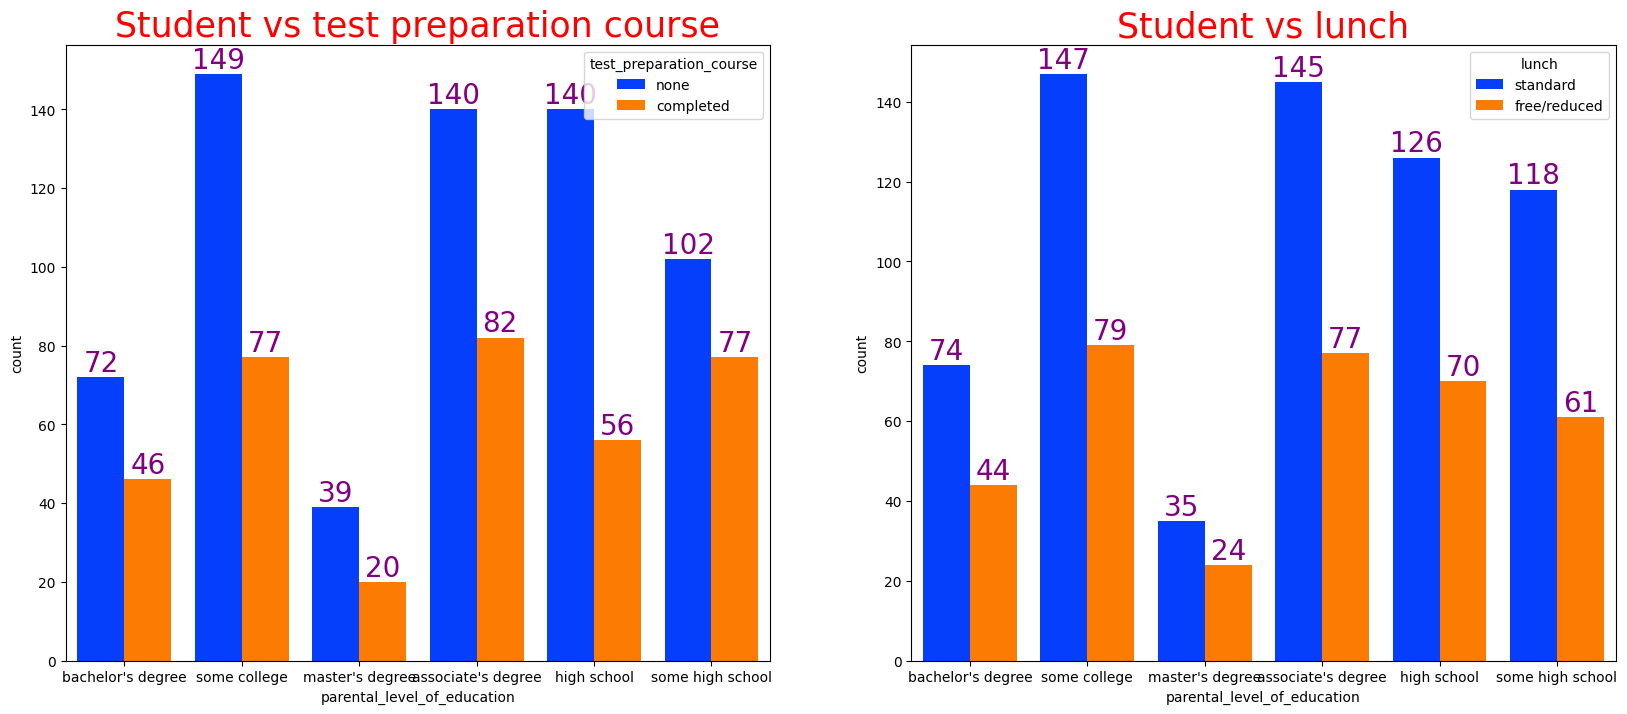

In [9]:
f, ax = plt.subplots(1,2, figsize=(20, 8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.98, ax=ax[0])
ax[0].set_title("Student vs test preparation course", color='red', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='purple', size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.98, ax=ax[1])
ax[1].set_title("Student vs lunch", color='red', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='purple', size=20)

#### Insights
- Students with standard lunch have significantly higher average scores across all subjects compared to those with free/reduced lunch.

## Test preparation course COLUMN
- How many students have completed the test preparation course ? 
- Is test preparation course completion affects student performance ?
#### Univariate Analysis ( How many students have completed the test preparation course ? ) 

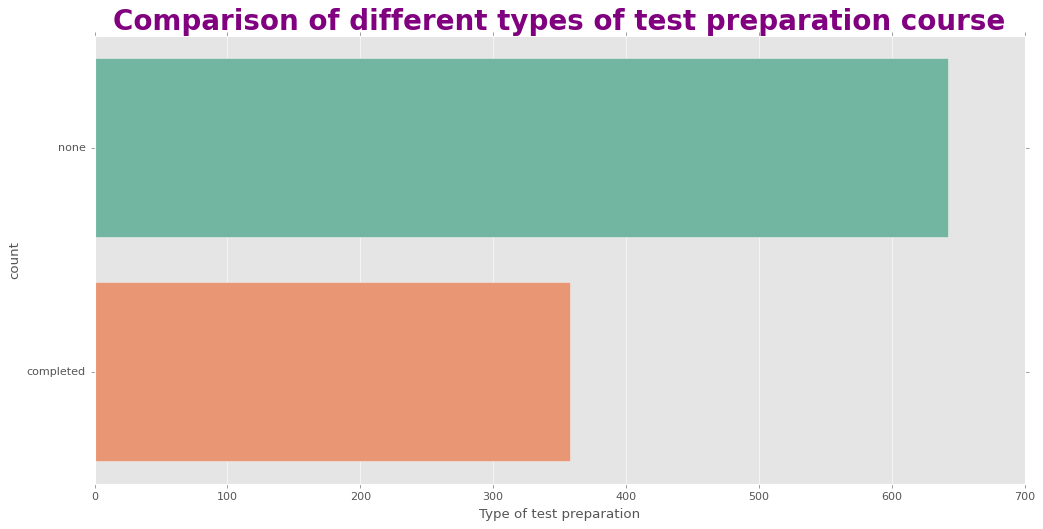

In [24]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')
sns.countplot(df['test_preparation_course'], palette='Set2')
plt.title("Comparison of different types of test preparation course", fontweight=800, fontsize=25, color='purple')
plt.xlabel('Type of test preparation')
plt.ylabel('count')
plt.show()

#### Insights
- Majority of students non-completed the test preparation course (642) compared to those who completed it (358).

### Bivariate Analysis ( Is test preparation course completion affects student performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

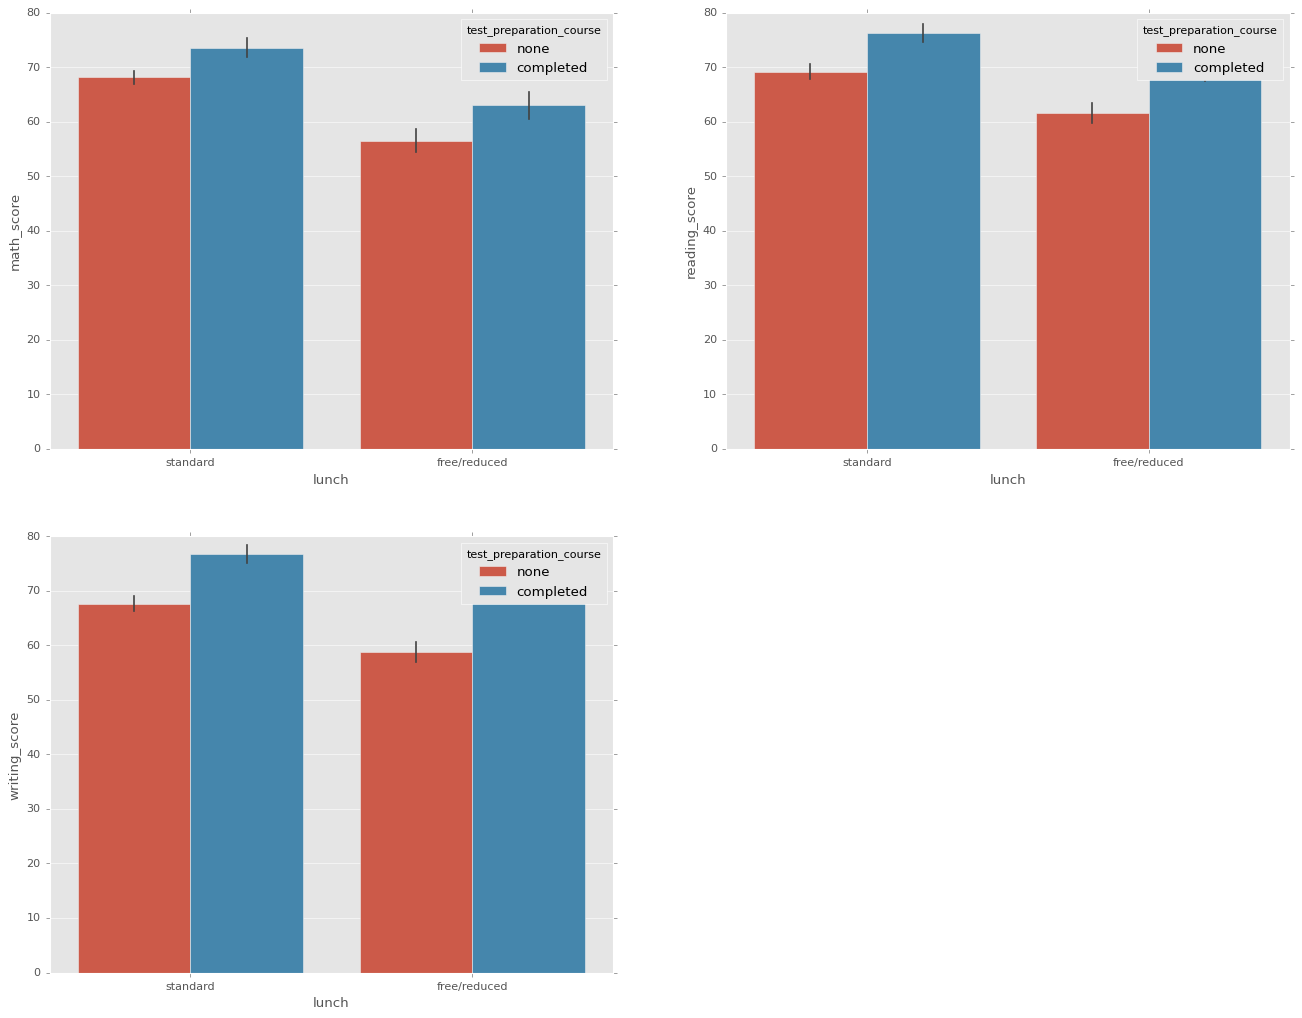

In [25]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights
- Students who completed the test preparation course have notably higher average scores across all subjects compared to those who did not complete it.

### Checking outliers

In [19]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

<Axes: ylabel='average_score'>

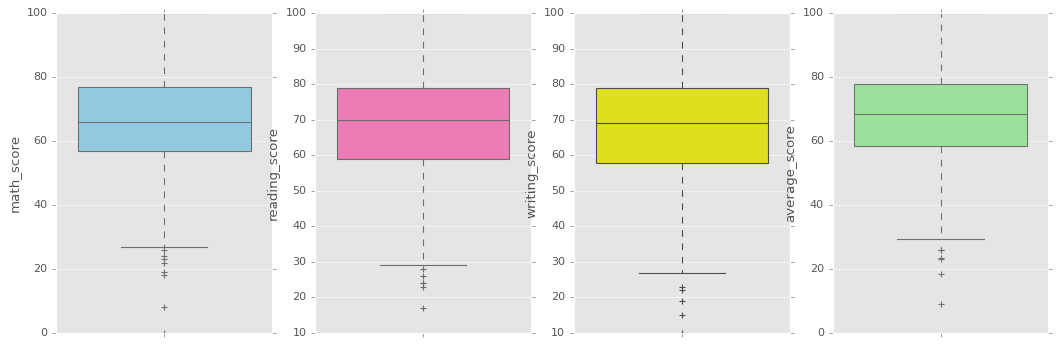

In [26]:
plt.subplots(1,4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'], color='lightgreen')

### Multivariate Analysis

<Figure size 2000x800 with 0 Axes>

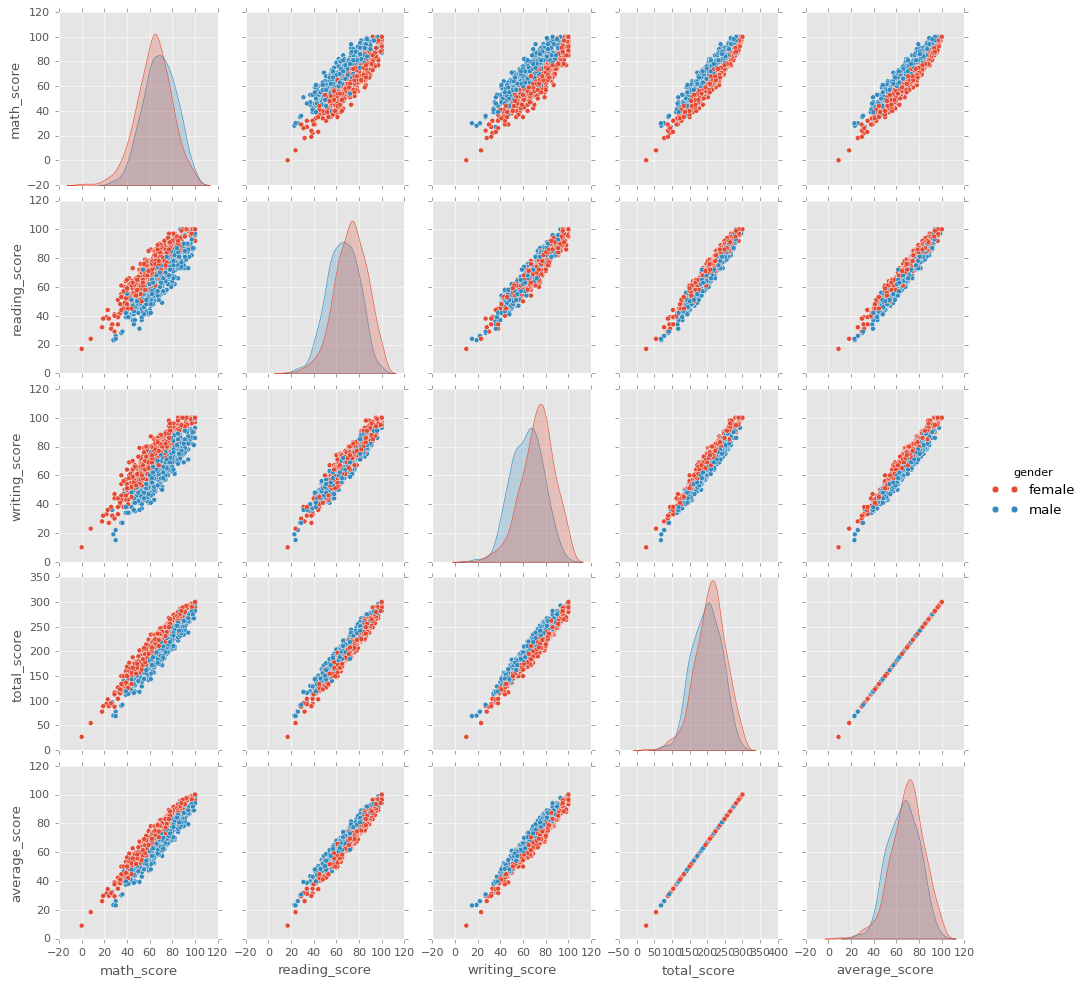

In [29]:
plt.figure(figsize=(25, 10))
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
- From the pairplot, it is evident that female students generally outperform male students across all subjects, as indicated by the clustering of data points.
- It is linear in nature, suggesting a consistent trend across different subjects.

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [1]:
import sys
print(sys.executable)

c:\Coding\AI_ML_DL\ml-experiments\venv\python.exe
